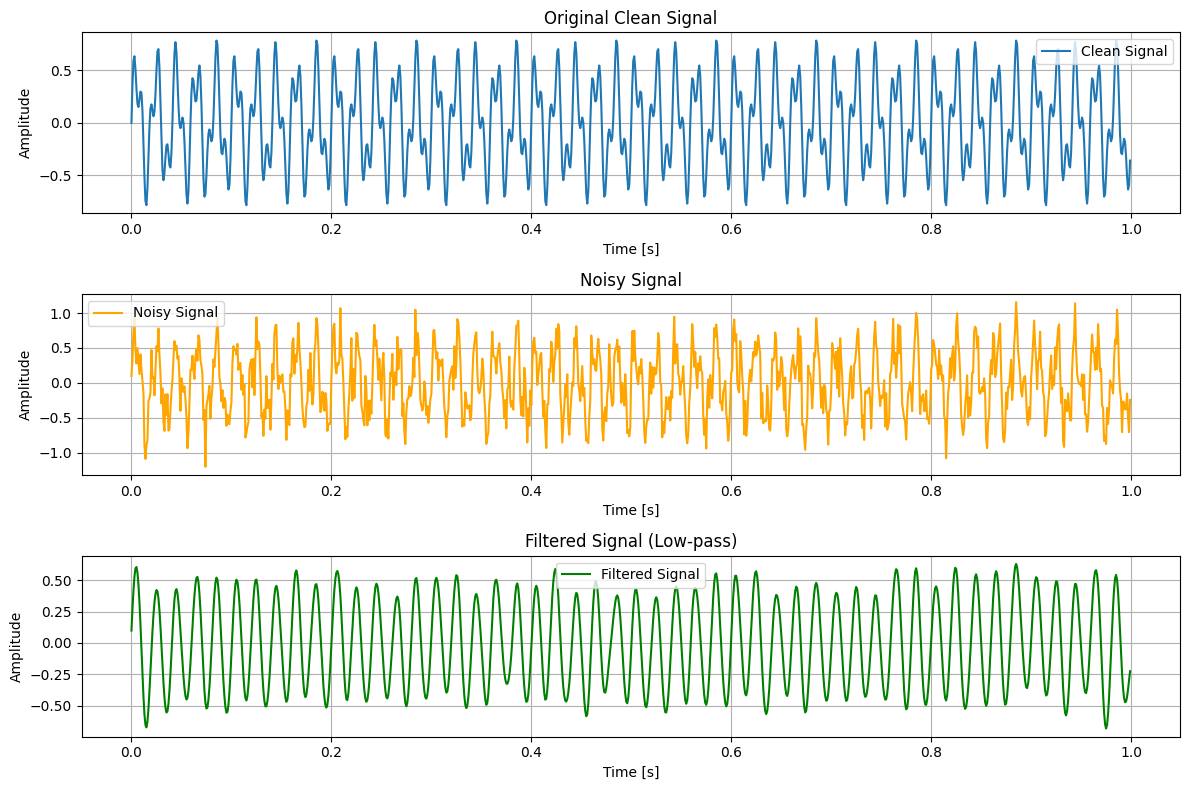

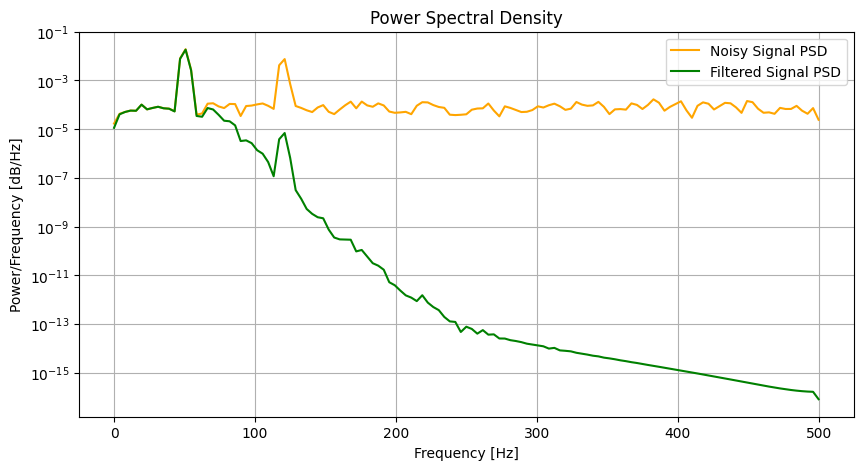

In [3]:
# Import required libraries
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import signal # type: ignore

# Set up plotting to display in the notebook
%matplotlib inline

# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector (1 second)

# Generate a composite signal: sum of two sine waves
f1, f2 = 50, 120  # Frequencies of the sine waves (Hz)
signal_clean = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)

# Add some noise to the signal
np.random.seed(42)  # For reproducibility
noise = 0.2 * np.random.normal(size=t.size)
signal_noisy = signal_clean + noise

# Design a low-pass filter
cutoff = 80  # Cutoff frequency (Hz)
nyquist = fs / 2
order = 4  # Filter order
b, a = signal.butter(order, cutoff / nyquist, btype='low', analog=False)

# Apply the filter to the noisy signal
signal_filtered = signal.filtfilt(b, a, signal_noisy)

# Plotting
plt.figure(figsize=(12, 8))

# Original clean signal
plt.subplot(3, 1, 1)
plt.plot(t, signal_clean, label='Clean Signal')
plt.title('Original Clean Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, signal_noisy, label='Noisy Signal', color='orange')
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, signal_filtered, label='Filtered Signal', color='green')
plt.title('Filtered Signal (Low-pass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Frequency domain analysis (Power Spectral Density)
f, psd_noisy = signal.welch(signal_noisy, fs, nperseg=256)
f, psd_filtered = signal.welch(signal_filtered, fs, nperseg=256)

plt.figure(figsize=(10, 5))
plt.semilogy(f, psd_noisy, label='Noisy Signal PSD', color='orange')
plt.semilogy(f, psd_filtered, label='Filtered Signal PSD', color='green')
plt.title('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [dB/Hz]')
plt.grid(True)
plt.legend()
plt.show()